<a href="https://colab.research.google.com/github/zackyalgiffari/Kendaraan-Perempatan-Time-Series-Analysis/blob/main/Time_Series_Analysis_Jumlah_Kendaraan_Perempatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARY**

Library yang digunakan sebagai berikut:

1. pandas: untuk membaca dan mengolah data
2. numpy: untuk melakukan operasi matematika pada data
3. matplotlib.pyplot: untuk membuat plot
4. seaborn: untuk membuat visualisasi data yang menarik
5. statsmodels: untuk melakukan analisis data statistik dan pemodelan ARMA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from scipy.stats import boxcox

import warnings
warnings.filterwarnings('ignore')

#**IMPORT DATASET**


Pada bagian ini akan di-*import*kan dataset yang telah disediakan

Dataset yang digunakan : "8. Data Jumlah Kendaraan Perempatan"

In [ ]:
dataset = "https://drive.google.com/uc?export=download&id=1HxaW1snsQS4NpEWW2xCoRI8LIAlUpTTt"
data = pd.read_excel(dataset)

#**Preview data**


Pada bagian ini akan ditampilkan 5 baris pertama pada data

In [ ]:
data.head(5)

,Waktu (Harian),Jumlah Kendaraan
0,1,1559
1,2,1041
2,3,1039
3,4,4328
4,5,4747


#**Menampilkan Informasi Dasar Data**

pada bagian ini akan ditampilkan informasi dasar tentang dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Waktu (Harian)    730 non-null    int64
 1   Jumlah Kendaraan  730 non-null    int64
dtypes: int64(2)
memory usage: 11.5 KB


#M**enampilkan Benyaknya Missing Value pada Dataset**

Pada bagian ini akan ditampilkan banyaknya missing value pada datset.

In [ ]:
data.isna().sum()

Waktu (Harian)      0
Jumlah Kendaraan    0
dtype: int64

##**A. Plot data**


##**Menampilkan line plot**

untuk membuat line plot yang menampilkan perubahan jumlah kendaraan seiring waktu (harian).

<Axes: xlabel='Waktu (Harian)', ylabel='Jumlah Kendaraan'>

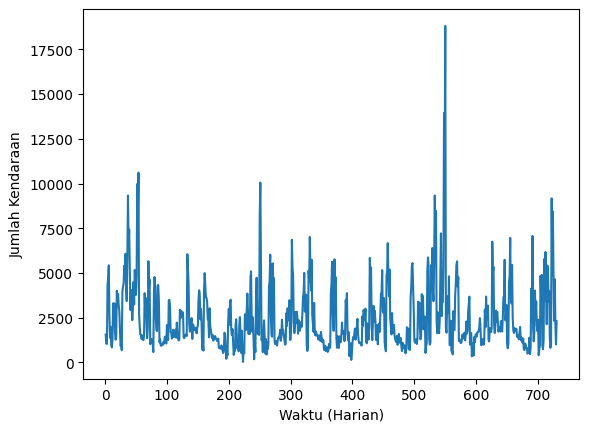

In [ ]:
sns.lineplot(data=data, x="Waktu (Harian)", y="Jumlah Kendaraan")



###Membuat Fungsi Homoskedastic

Fungsi is_homoskedastic adalah checker untuk homoskedastisitas berdasarkan nilai p-value dari uji heteroskedastisitas. Jika nilai p-value lebih besar atau sama dengan tingkat signifikansi yang ditentukan, fungsi ini mengembalikan True, menandakan bahwa tidak ada bukti statistik yang signifikan untuk heteroskedastisitas. Sebaliknya, jika nilai p-value kurang dari tingkat signifikansi, fungsi ini mengembalikan False, menandakan adanya bukti statistik yang signifikan untuk heteroskedastisitas.

In [ ]:
def is_homoskedastic(p_value, significance_level=0.05):
    """
    Checker untuk homoskedastisitas berdasarkan nilai p-value.

    Parameters:
    - p_value (float): Nilai p dari uji heteroskedastisitas.
    - significance_level (float): Tingkat signifikansi yang digunakan untuk menentukan keberhasilan.

    Returns:
    - True jika homoskedastis (tidak ada bukti statistik signifikan untuk heteroskedastisitas), False sebaliknya.
    """
    return p_value >= significance_level


Uji Homoskedastic

1. Membuat Variabel Independen (X_before): Menghasilkan variabel independen sebagai array berurutan berdasarkan panjang data 'Jumlah Kendaraan', dan menambahkan konstanta ke array tersebut menggunakan sm.add_constant.

2. Model Regresi (model_before): Membuat model regresi Ordinary Least Squares (OLS) menggunakan sm.OLS. Model ini melakukan regresi linear terhadap 'Jumlah Kendaraan' terhadap variabel independen yang telah dibuat.

3. Fit Model (results_before): Menggunakan data dan model yang telah dibuat, melakukan fitting atau training model dengan memanggil fit() pada objek model.

4. Residual sebelum Transformasi (residuals_before): Mengambil residual dari hasil fitting model.

5. Uji Breusch-Pagan-Godfrey (het_breuschpagan): Melakukan uji Breusch-Pagan-Godfrey untuk menguji homoskedastisitas pada residual sebelum transformasi. Hasil uji, termasuk p-value, disimpan dalam variabel p_value_before.

6. Cetak Hasil dan Evaluasi Homoskedastisitas (is_homoskedastic): Mencetak nilai p-value hasil uji. Selanjutnya, menggunakan fungsi is_homoskedastic untuk menentukan apakah residual setelah transformasi dianggap homoskedastis atau mungkin heteroskedastis berdasarkan p-value yang diperoleh.

In [ ]:
X_before = np.arange(len(data['Jumlah Kendaraan']))
X_before = sm.add_constant(X_before)
model_before = sm.OLS(data['Jumlah Kendaraan'], X_before)
results_before = model_before.fit()

# Residual sebelum transformasi
residuals_before = results_before.resid

# Uji Breusch-Pagan-Godfrey sebelum transformasi
_, p_value_before, _, _ = het_breuschpagan(residuals_before, X_before)
print(f'P-value sebelum transformasi: {p_value_before}')
homoskedastic_after = is_homoskedastic(p_value_before)
if homoskedastic_after:
    print("Residu setelah transformasi adalah homoskedastis.")
else:
    print("Residu setelah transformasi mungkin heteroskedastis.")

P-value sebelum transformasi: 0.2978140951294691
Residu setelah transformasi adalah homoskedastis.


##**B. Periksa kestasioneran data terhadap Variansi, menggunakan Box-Cox**


1. Transformasi Box-Cox (fitted_data, fitted_lambda): Menggunakan fungsi boxcox dari modul scipy.stats untuk melakukan transformasi Box-Cox pada data 'Jumlah Kendaraan'. Hasil transformasi dan nilai lambda yang digunakan disimpan dalam variabel fitted_data dan fitted_lambda masing-masing.

2. Membuat Subplots (fig, ax): Membuat subplot dengan 1 baris dan 2 kolom, dengan ukuran total gambar 12x5.

3. Plot Distribusi Tidak Normal (ax[0]): Pada subplot pertama, melakukan plotting histogram distribusi data 'Jumlah Kendaraan' sebelum transformasi (dengan warna hijau) menggunakan sns.histplot. Ditambahkan judul, label sumbu x dan y.

4. Plot Distribusi yang Sudah Di-transformasi (ax[1]): Pada subplot kedua, melakukan plotting histogram distribusi data yang telah di-transformasi (dengan warna biru). Judul dan label sumbu disertakan juga.

5. Menambahkan Legend: Menambahkan legend ke kedua subplot untuk membedakan distribusi sebelum dan sesudah transformasi.

6. Print Nilai Lambda: Mencetak nilai lambda yang digunakan untuk transformasi.


Analisis Visualisasi :

Menyesuaikan Layout dan Menampilkan Plot: Menyesuaikan layout subplot dan menampilkan gambar.

1. Distribusi Non-Normal (Hijau): Pada sisi kiri, kita melihat distribusi non-normal dengan frekuensi tertinggi pada nilai rendah dan menurun seiring dengan peningkatan nilai. Ini menunjukkan bahwa sebagian besar data berkumpul di ujung skala yang lebih rendah. Sumbu x mewakili “Nilai” dan berkisar dari 0 hingga 17500, sedangkan sumbu y mewakili “Frekuensi” dan berkisar dari 0 hingga 140.

2. Distribusi yang Telah Ditransformasi (Box-Cox) (Biru): Sisi kanan menunjukkan distribusi yang telah ditransformasi menggunakan metode Box-Cox, menghasilkan distribusi normal. Distribusi ini tampak simetris dan berbentuk lonceng, yang menunjukkan distribusi normal. Sumbu x mewakili “Nilai”, tetapi kali ini berkisar dari sekitar 4 hingga 14.







Lambda value used for Transformation: 0.08500942274363041


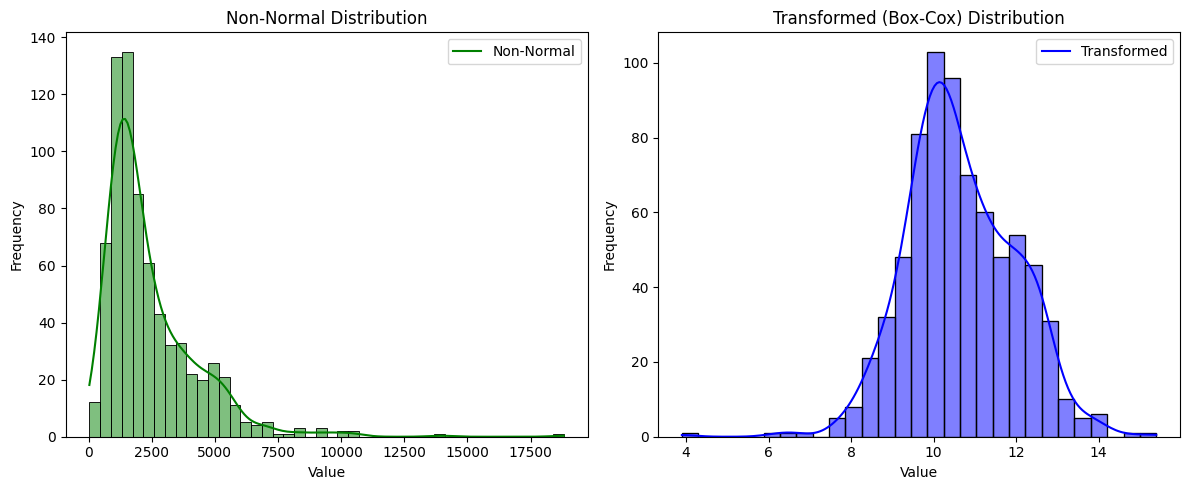

In [ ]:

fitted_data, fitted_lambda = boxcox(data['Jumlah Kendaraan'])
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot distribusi yang tidak normal (skewed)
sns.histplot(data['Jumlah Kendaraan'], kde=True, color='green', ax=ax[0])
ax[0].set_title('Non-Normal Distribution')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Frequency')

# Plot distribusi yang sudah di-transformasi (normal)
sns.histplot(fitted_data, kde=True, color='blue', ax=ax[1])
ax[1].set_title('Transformed (Box-Cox) Distribution')
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Frequency')

# Menambahkan legenda ke subplot
ax[0].legend(['Non-Normal'], loc='upper right')
ax[1].legend(['Transformed'], loc='upper right')

# Menampilkan lambda yang digunakan untuk transformasi
print(f"Lambda value used for Transformation: {fitted_lambda}")

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
X_after = np.arange(len(fitted_data))
X_after = sm.add_constant(X_after)
model_after = sm.OLS(fitted_data, X_after)
results_after = model_after.fit()

# Residual setelah transformasi
residuals_after = results_after.resid

# Uji Breusch-Pagan-Godfrey setelah transformasi
_, p_value_after, _, _ = het_breuschpagan(residuals_after, X_after)

print(f'P-value setelah transformasi: {p_value_after}')
homoskedastic_after = is_homoskedastic(p_value_after)
if homoskedastic_after:
    print("Residu setelah transformasi adalah homoskedastis.")
else:
    print("Residu setelah transformasi mungkin heteroskedastis.")


P-value setelah transformasi: 0.6354682747724851
Residu setelah transformasi adalah homoskedastis.




#**Uji ADF**

melakukan uji ADF pada kolom "Jumlah Kendaraan" untuk menentukan stasioneritas data. Hasil uji ADF disimpan dalam variabel adf_test
dan didapat uji ADF stasioner.

In [ ]:
adf_test = adfuller(fitted_data)
print("ADF Statistic:", adf_test[0])
print("P-value:", adf_test[1])
print("Critical Values:", adf_test[4])

# Interpret the results
if adf_test[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")
#stasioner

ADF Statistic: -3.725372391788625
P-value: 0.003770097335578154
Critical Values: {'1%': -3.439593802573824, '5%': -2.865619356068967, '10%': -2.568942332870462}
The time series is likely stationary.


#**C. Periksa kestasioneran data terhadap Mean gunakan Uji ADF**

#**Hasil Uji ADF dan Membuat Plot**

Pada bagian ini digunakan untuk membuat plot hasil uji Augmented Dickey-Fuller (ADF) pada data deret waktu.


###Uji ADF dan Pengaturan Awal
* menggunakan fungsi adfuller(series) untuk melakukan uji Augmented Dickey-Fuller
* pada data deret waktu yang diberikan dan menyimpan hasilnya dalam variabel result.
* significance_level adalah tingkat signifikansi yang Anda tetapkan pada 0,05 (5%).
* adf_stat menyimpan statistik uji ADF.
* p_val adalah nilai p dari uji ADF.
* crit_val_1, crit_val_5, dan crit_val_10 adalah ambang batas kritis pada tingkat signifikansi 1%, 5%, dan 10%.

###Membuat Plot
menentukan warna garis plot berdasarkan hasil uji ADF dan ambang batas kritis. Jika nilai p lebih kecil dari tingkat signifikansi dan statistik ADF lebih kecil dari ambang batas kritis tertentu, maka warna garis akan berbeda sesuai kondisi tersebut. Setelah menentukan warna garis maka akan dibentuk plot

In [ ]:
# @title
def visualize_adfuller_results(series, title):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & (adf_stat < crit_val_1):
        linecolor = 'forestgreen'
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=data['Waktu (Harian)'], y=series, color=linecolor)
    plt.title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    plt.ylabel(ylabel=title, fontsize=14)

#**Visualisasi**

Pada bagian ini disajikan visualisasi terhadap uji ADF

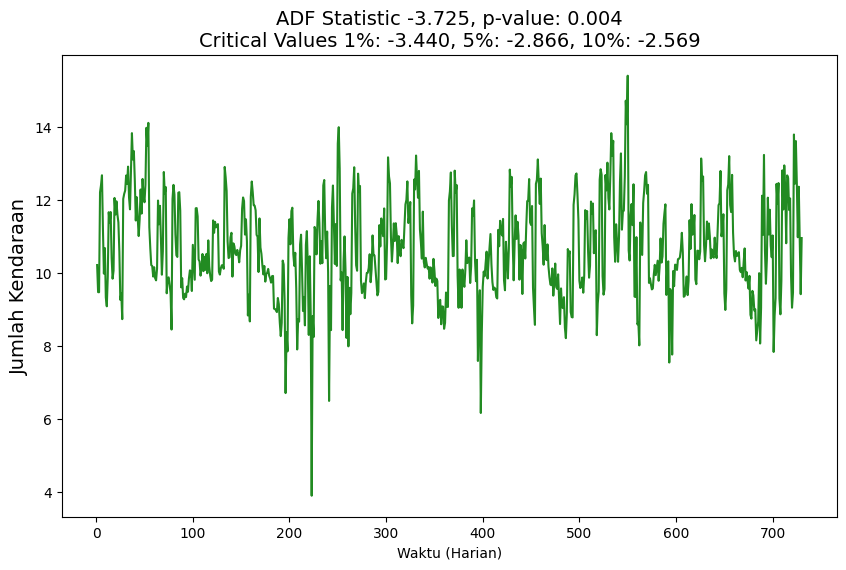

In [ ]:
visualize_adfuller_results(fitted_data, "Jumlah Kendaraan")

#**F. Plot ACF dan PACF, kemudian identifikasi ordernya berdasarkan nilai ACF, dan PACF**
yang mengalami cut-off setelah lag tertentu.

##**Visualisasi Plot ACF dan PACF**

Pada bagian ini digunakan untuk membuat plot Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF) dari data deret waktu.

1. Autocorrelation (ACF): Pada plot ACF, nilai-nilai secara bertahap menurun tetapi tetap berada dalam interval kepercayaan yang ditunjukkan oleh area berwarna biru. Ini menunjukkan bahwa tidak ada cut-off yang jelas pada plot ACF.

2. Partial Autocorrelation (PACF): Pada plot PACF, ada lonjakan signifikan pada lag 0 dan lag 1 yang melewati interval kepercayaan. Setelah lag 1, semua nilai lainnya jatuh dalam interval kepercayaan, menunjukkan tidak ada autocorrelation parsial yang signifikan untuk lag tersebut. Ini menunjukkan cut-off setelah lag 1.

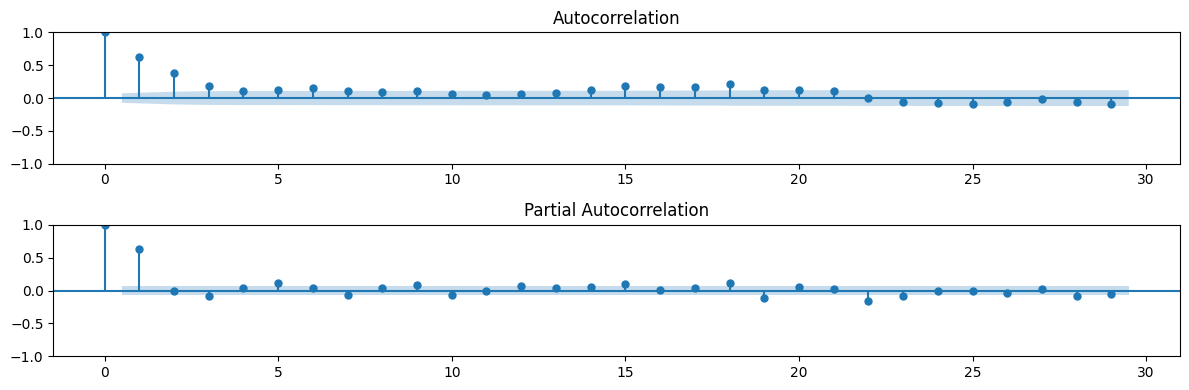

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 4))
plot_acf(fitted_data, ax=ax[0])
plot_pacf(fitted_data, ax=ax[1])

plt.tight_layout()
plt.show()

#**IMPORT FUNGSI**
mengimpor fungsi mean_squared_error dari modul sklearn.metrics yang digunakan untuk mengukur tingkat kesalahan (MSE) dalam model prediksi atau regresi.

In [ ]:
from sklearn.metrics import mean_squared_error

#**G. Identifikasi model ARMA(p,q) atau ARIMA(p,d,q)**
#**H. Pilih model yang terbaik. Menggunakan nilai AIC**

###**IMPORT LIBRARY**
1. pandas
2. ProcessPoolExecutor dan process_map dari concurrent.futures: Digunakan untuk melakukan eksekusi paralel dengan menggunakan multiple processes.
3. statsmodels.api: Digunakan untuk membangun model ARMA dan melakukan analisis statistik.

###**Fungsi calculate_aic**
1. Menerima parameter (p, d, q).
2. Membuat model ARIMA dengan parameter tersebut dan menghitung AIC.
3. Mengembalikan nilai (p, d, q, aic) jika nilai AIC melebihi batas tertentu (dalam hal ini >100) untuk memasukkan model ke dalam perbandingan.
4. Menangkap exception jika terjadi kesalahan selama proses dan mencetak pesan kesalahan.


###**Menampilkan Progres**:
1. Menghitung total kombinasi yang akan dieksplorasi.
2. Menggunakan ProcessPoolExecutor untuk menjalankan fungsi calculate_aic secara paralel dengan berbagai kombinasi parameter.
3. Mengumpulkan hasil dan menambahkannya ke dalam list aic_values.
4. Mencetak progres setiap kali sebuah kombinasi selesai dieksekusi.


###**Membuat DataFrame dan Mencetak Hasil:**
1. Mengonversi list aic_values ke dalam DataFrame.
2. Mencetak DataFrame sebagai tabel hasil.
3. Jika terdapat hasil yang valid, mencetak informasi tentang model terbaik berdasarkan nilai AIC terkecil.

In [ ]:
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
from tqdm.contrib.concurrent import process_map
import statsmodels.api as sm

# Inisialisasi list untuk menyimpan nilai AIC
aic_values = []

# Inisialisasi dengan nilai tak terhingga agar dapat dicari nilai minimum
best_aic = float('inf')
best_p, best_d, best_q = None, None, None

# Define the function to calculate AIC for a given set of parameters
def calculate_aic(params):
    p, d, q = params
    try:
        model_arima = sm.tsa.ARIMA(fitted_data, order=(p, d, q))
        results = model_arima.fit()
        aic = results.aic

        # Menetapkan kriteria untuk memasukkan model ke dalam perbandingan
        if aic is not None and aic > 100:  # Ganti dengan kriteria yang sesuai
            return p, d, q, aic
    except Exception as e:
        # Handle exceptions if any
        print(f"Exception in ARIMA({p},{d},{q}): {e}")
        return None

# Loop untuk menampilkan bar progres
total_combinations = len(list(range(0, 7))) * len(list(range(0, 3))) * len(list(range(0, 7)))
completed_combinations = 0

# Use ProcessPoolExecutor for parallelism
with ProcessPoolExecutor() as executor:
    params_list = [(p, d, q) for p in range(0, 7) for d in range(0, 3) for q in range(0, 7)]
    results = list(process_map(calculate_aic, params_list, max_workers=None, chunksize=1))

    # Collect valid results
    aic_values.extend(filter(None, results))
    completed_combinations += len(params_list)

    # Print progress
    print(f"Progress: {completed_combinations}/{total_combinations}")

# Membuat DataFrame dari list aic_values
columns = ['p', 'd', 'q', 'aic']
df_results = pd.DataFrame(aic_values, columns=columns)

# Mencetak DataFrame
print("\nTable of Results:")


# Mencetak informasi tentang model terbaik
if aic_values:
    best_p, best_d, best_q, best_aic = min(aic_values, key=lambda x: x[3])
    print(f"\nBest ARIMA({best_p},{best_d},{best_q}) - AIC: {best_aic}")
else:
    print("No valid AIC values found.")


  0%|          | 0/147 [00:00<?, ?it/s]

Progress: 147/147

Table of Results:

Best ARIMA(3,0,6) - AIC: 2078.473058674246


##**Menampilkan Nilai AIC**


Objek DataFrame df_results menyimpan hasil pencarian parameter untuk model ARIMA atau ARMA. Setiap baris dalam DataFrame ini mewakili satu kombinasi parameter (p, d, q) berserta nilai AIC yang dihasilkan dari model ARIMA atau ARMA yang sesuai. Kolom-kolom dalam DataFrame ini adalah 'p', 'd', 'q', dan 'aic'.



In [ ]:
df_results

,p,d,q,aic
0,0,0,0,2481.442403
1,0,0,1,2228.483644
2,0,0,2,2145.002343
3,0,0,3,2113.605545
4,0,0,4,2115.599610
...,...,...,...,...
141,6,2,2,2176.607056
142,6,2,3,2150.823695
143,6,2,4,2159.499044
144,6,2,5,2111.956552


##**Model ARMA dan Plot Diagnostik**

1. Membuat model ARMA dengan parameter terbaik yang telah ditemukan sebelumnya (best_p, best_d, best_q).
2. Melakukan fitting model tersebut ke data deret waktu (fitted_data).
3. Menampilkan plot diagnostik untuk evaluasi kualitas model, termasuk histogram residu, plot kepadatan, plot Quantile-Quantile (Q-Q), dan plot otokorelasi.


Visualisasi ini menampilkan empat plot yang berbeda yang memberikan informasi tentang model statistik:

1. Residual Terstandarisasi untuk “y” (Kiri Atas): Plot ini menunjukkan residual terstandarisasi dari model. Residual adalah perbedaan antara nilai yang diamati dan nilai yang diprediksi oleh model. Dalam plot ini, residual tampak bervariasi di sekitar garis nol dan tidak menunjukkan pola atau tren yang jelas, yang menunjukkan bahwa model mungkin cocok dengan baik.

2. Normal Q-Q (Kiri Bawah): Plot Q-Q digunakan untuk memeriksa apakah data mengikuti distribusi normal. Dalam plot ini, titik-titik mengikuti garis merah dengan cukup dekat, yang menunjukkan bahwa residual memiliki distribusi normal.

3. Histogram plus Kepadatan Estimasi (Kanan Atas): Histogram menunjukkan distribusi data. Garis hijau adalah Estimasi Kepadatan Kernel (KDE) dan oranye adalah N(0,1), yang menunjukkan sejauh mana data mengikuti distribusi normal.

4. Correlogram (Kanan Bawah): Correlogram menunjukkan korelasi otomatis dari residual pada lag yang berbeda.Menunjukkan bahwa tidak ada korelasi otomatis yang signifikan pada lag yang berbeda.

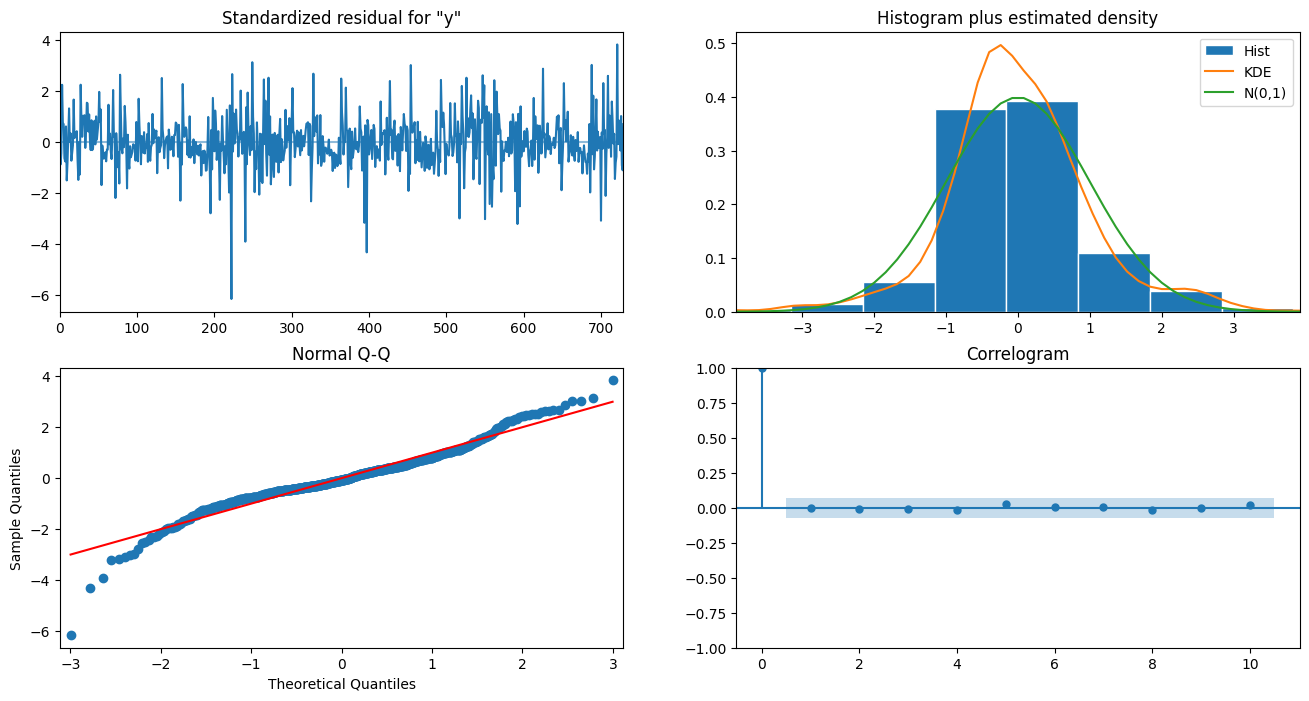

In [ ]:
model_arima = sm.tsa.ARIMA(fitted_data, order=(best_p, best_d, best_q))
results = model_arima.fit(method='innovations_mle') # Estimasi menggunakan Maximum Likelihood

results.plot_diagnostics(figsize=(16, 8))
plt.show()

##**SUMMARY**

menampilkan ringkasan statistik dari model ARMA yang telah di-fit ke data. Ini menyajikan informasi penting seperti jenis model, parameter-model, metode fitting, serta evaluasi performa model seperti AIC, BIC, uji otokorelasi, dan uji normalitas residu.

In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  730
Model:                 ARIMA(3, 0, 6)   Log Likelihood               -1028.071
Date:                Sun, 31 Dec 2023   AIC                           2078.141
Time:                        09:58:05   BIC                           2128.665
Sample:                             0   HQIC                          2097.634
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6552      0.156     68.092      0.000      10.348      10.962
ar.L1         -0.0532      0.055     -0.968      0.333      -0.161       0.054
ar.L2         -0.0564      0.054     -1.049      0.2

#**I. Estimasi parameter menggunakan metode Maximum Likelihood, kemudian diuji siginifikasi terhadap parameter**

###**1. Menampilkan Uji Signifikansi**
Menampilkan judul "Significance Test for Parameters".
Melakukan iterasi pada parameter-model untuk menampilkan nilai z dan p dari uji signifikansi.

In [ ]:
import statsmodels.api as sm
import numpy as np
from scipy.stats import norm

# Misalkan fitted_data adalah data yang telah di-fit ke model ARIMA
# Gantilah dengan data yang sesuai
# Gantilah p, d, dan q sesuai dengan model ARIMA yang ingin Anda estimasi
# Menampilkan hasil estimasi parameter
print("Parameter Estimates:")

# Mengekstrak nilai-nilai yang dibutuhkan untuk uji signifikansi
params = results.params
standard_errors = results.bse
z_values = params / standard_errors
p_values = 2 * (1 - norm.cdf(np.abs(z_values)))

# Menampilkan hasil uji signifikansi
print("\nSignificance Test for Parameters:")
param_names = results.summary().tables[1].data[0][1:]
for i, param in enumerate(param_names):
    print(f"{param}: z-value = {z_values[i]:.12f}, p-value = {p_values[i]:.12f}")
    # Menggunakan uji t untuk menguji signifikansi parameter



Parameter Estimates:

Significance Test for Parameters:
coef: z-value = 68.091713786581, p-value = 0.000000000000
std err: z-value = -0.968474594751, p-value = 0.332807400968
z: z-value = -1.049316063434, p-value = 0.294032675266
P>|z|: z-value = 17.781949967574, p-value = 0.000000000000
[0.025: z-value = 10.015275133371, p-value = 0.000000000000
0.975]: z-value = 5.636427801405, p-value = 0.000000017361


#**J. Lakukan Uji Kelayakan model menggunakan Ljung-Box**

###**1.Import Library**
Mengimport fungsi acorr_ljungbox dari library Statsmodels untuk melakukan uji Ljung-Box.

###**2. Mengambil Residuals**
Mengambil residu dari hasil fitting model ARMA.

###**3. Melakukan Uji Ljung-Box**
Melakukan uji Ljung-Box pada residu dengan jumlah lags yang ditentukan.

###**4. Ekstraksi Nilai Uji Statistik dan p-value**

###**5. Menampilkan Hasil Uji Ljung-Box**
Menampilkan hasil uji Ljung-Box untuk setiap lag, termasuk nilai uji statistik dan p-value.

###**6. Kesimpulan Uji Ljung-Box:**
Menampilkan kesimpulan berdasarkan hasil uji, apakah terdapat autokorelasi yang signifikan dalam residu.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = results.resid

# Uji Ljung-Box
lags = 50  # Ganti dengan jumlah lags yang diinginkan
lb_test_results = acorr_ljungbox(residuals, lags=lags)
# lb_test_results
# Mengekstrak nilai-nilai uji statistik dan p-value
test_statistics = lb_test_results['lb_stat']
p_values = lb_test_results['lb_pvalue']

# Menampilkan hasil uji Ljung-Box
print("Ljung-Box Test Results:")
for i in range(lags):
    print(f"Lag {i+1}: Test Statistic = {test_statistics.iloc[i]:.4f}, p-value = {p_values.iloc[i]:.4f}")

# Menampilkan kesimpulan uji Ljung-Box
significance_level = 0.05
significant_lags = sum(p_values < significance_level)
print(f"\nNumber of Lags with Significant Autocorrelation: {significant_lags}")
if significant_lags == 0:
    print("The residuals do not show significant autocorrelation.")
else:
    print("The residuals show significant autocorrelation.")

Ljung-Box Test Results:
Lag 1: Test Statistic = 0.0015, p-value = 0.9692
Lag 2: Test Statistic = 0.0901, p-value = 0.9560
Lag 3: Test Statistic = 0.2070, p-value = 0.9765
Lag 4: Test Statistic = 0.4503, p-value = 0.9782
Lag 5: Test Statistic = 0.8685, p-value = 0.9725
Lag 6: Test Statistic = 0.8958, p-value = 0.9893
Lag 7: Test Statistic = 0.9222, p-value = 0.9960
Lag 8: Test Statistic = 1.1959, p-value = 0.9967
Lag 9: Test Statistic = 1.2066, p-value = 0.9988
Lag 10: Test Statistic = 1.4384, p-value = 0.9991
Lag 11: Test Statistic = 1.4810, p-value = 0.9996
Lag 12: Test Statistic = 5.6905, p-value = 0.9309
Lag 13: Test Statistic = 6.0630, p-value = 0.9438
Lag 14: Test Statistic = 7.3013, p-value = 0.9225
Lag 15: Test Statistic = 8.9259, p-value = 0.8814
Lag 16: Test Statistic = 9.7909, p-value = 0.8773
Lag 17: Test Statistic = 10.8137, p-value = 0.8661
Lag 18: Test Statistic = 22.7167, p-value = 0.2017
Lag 19: Test Statistic = 23.9867, p-value = 0.1967
Lag 20: Test Statistic = 25.8342

#**K. Lakukan Uji Kenormalan sisaan dengan menggunakan Kolmogorof-Smirnov**

###**1. Import Library**
Mengimport fungsi kstest dari library SciPy untuk melakukan uji normalitas.

###**2. Mengambil Residuals**
Mengambil residu dari hasil fitting model ARMA.

###**3. Melakukan Uji Kolmogorov-Smirnov**
Melakukan uji normalitas Kolmogorov-Smirnov pada residu terhadap distribusi normal.

###**4. Menampilkan Hasil Uji Normalitas**
Menampilkan hasil uji normalitas, termasuk nilai uji statistik dan p-value.

###**5. Menampilkan Kesimpulan**
Menampilkan kesimpulan berdasarkan p-value, apakah residu dianggap memiliki distribusi normal atau tidak.

In [ ]:
from scipy.stats import kstest

# Misalkan 'results' adalah model ARIMA yang telah di-fit
# Gantilah dengan model ARIMA yang sesuai
residuals = results.resid

# Uji normalitas dengan Kolmogorov-Smirnov
statistic, p_value = kstest(residuals, 'norm')

# Menampilkan hasil uji normalitas
print(f"Kolmogorov-Smirnov Test Results:")
print(f"Test Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Menampilkan kesimpulan
alpha = 0.05
if p_value > alpha:
    print("Residuals are normally distributed (fail to reject the null hypothesis)")
else:
    print("Residuals are not normally distributed (reject the null hypothesis)")


Kolmogorov-Smirnov Test Results:
Test Statistic: 0.0754
P-value: 0.0005
Residuals are not normally distributed (reject the null hypothesis)


###**Parameter:**

1. actual: Data aktual yang menjadi referensi.
2. predicted: Data yang diprediksi oleh model.

###**Perhitungan SMAPE**
1. Menghitung penyebut dan selisih antara nilai aktual dan nilai prediksi.
2. Mengatasi pembagian oleh nol dengan menangani kasus di mana penyebut adalah nol.
3. Menghitung nilai SMAPE dengan mengambil rata-rata dari selisih yang telah dihitung.

###**Return Value**
Mengembalikan nilai SMAPE sebagai float.

In [ ]:
def calculate_smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) between actual and predicted values.

    Parameters:
    - actual: array-like, the actual values
    - predicted: array-like, the predicted values

    Returns:
    - smape: float, SMAPE value
    """
    denominator = (np.abs(actual) + np.abs(predicted)) / 2
    diff = np.abs(actual - predicted) / denominator
    diff[denominator == 0] = 0  # Handle division by zero
    smape = 100 * np.mean(diff)
    return smape



#**L. Lakukan forecasting, kemudian hitung RMSE**


###**Prediksi dengan Model ARMA**
1. Menggunakan model ARMA yang telah di-fit untuk melakukan prediksi.
2. Mendapatkan nilai rata-rata prediksi (pred_mean) dan interval kepercayaan (pred_ci).

###**Transformasi Box-Cox**
Menggunakan transformasi invers Box-Cox untuk mengembalikan nilai prediksi dan interval kepercayaan ke skala aslinya.

###**Menghitung RMSE dan SMAPE**
1. Menghitung Root Mean Squared Error (RMSE) antara nilai aktual dan prediksi.
2. Menghitung nilai SMAPE (Symmetric Mean Absolute Percentage Error) antara nilai aktual dan prediksi.

###**Visualisasi**
Membuat plot garis untuk nilai aktual dan nilai prediksi.

###**Interval Kepercayaan**
Menambahkan area di antara interval kepercayaan ke dalam plot.

###**Annotasi dan Tampilan Plot**
1. Menambahkan anotasi untuk nilai RMSE dan SMAPE.
2. Menampilkan plot dengan judul dan legend.



Visualisasi ini menunjukkan data real, prediksi, dan interval kepercayaan dari suatu parameter sepanjang waktu, yang dianalisis menggunakan model ARMA 3,0,3. Berikut adalah analisis:

1. Data Riil (Garis Biru): Garis ini menunjukkan data riil dari parameter yang sedang dianalisis. Seperti yang bisa kita lihat, data ini memiliki fluktuasi yang signifikan, yang menunjukkan variasi dalam parameter dari waktu ke waktu.

2. Prediksi (Garis Orange): Garis ini menunjukkan prediksi yang dibuat oleh model ARMA. Meskipun garis ini mengikuti pola umum dari data riil, ada beberapa titik di mana prediksi dan data riil tidak cocok. Ini menunjukkan bahwa model mungkin tidak sempurna dalam memprediksi fluktuasi dalam data.

3. Interval Kepercayaan (Area yang Diarsir): Area yang diarsir di sekitar garis prediksi menunjukkan interval kepercayaan untuk prediksi. Ini memberikan perkiraan tentang sejauh mana prediksi dapat berbeda dari nilai sebenarnya.

4. RMSE dan sMAPE: RMSE (Root Mean Square Error) adalah 1404.34 dan sMAPE (Symmetric Mean Absolute Percentage Error) adalah 35.60% error rate. Kedua metrik ini memberikan ukuran tentang seberapa akurat prediksi dibandingkan dengan data riil. RMSE memberikan ukuran rata-rata dari kesalahan prediksi, sedangkan sMAPE memberikan ukuran rata-rata dari kesalahan relatif. Nilai yang lebih rendah untuk kedua metrik ini menunjukkan prediksi yang lebih baik.




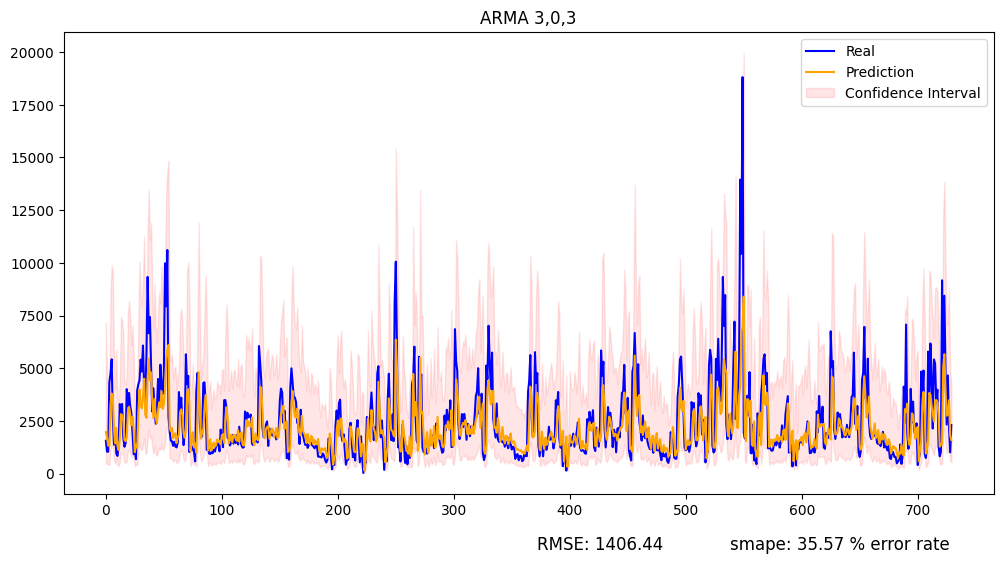

In [ ]:
from scipy.special import boxcox, inv_boxcox


pred = results.get_prediction(dynamic=False)

pred_mean = pred.predicted_mean

pred_ci = pred.conf_int()
pred_ci = inv_boxcox(pred_ci, fitted_lambda)

predicted_values = inv_boxcox(pred_mean, fitted_lambda)


actual = data['Jumlah Kendaraan']
rmse = np.sqrt(np.mean((actual - predicted_values) ** 2))

smape_value = calculate_smape(actual, predicted_values)
# print(f"SMAPE: {smape_value:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(actual, label='Real', color='b')
plt.plot(predicted_values, label='Prediction', color='orange')

# upper and lower confidence intervals
plt.fill_between(data.index, pred_ci[:, 0], pred_ci[:, 1], color='red', alpha=0.1, label='Confidence Interval')

plt.annotate(f'RMSE: {rmse:.2f}', (0.5, 0.02), xycoords='figure fraction', fontsize=12, ha='center')
plt.annotate(f'smape: {smape_value:.2f} % error rate', (0.7, 0.02), xycoords='figure fraction', fontsize=12, ha='center')
plt.title("ARMA 3,0,3")
plt.legend()
plt.show()


###**Membuat Indeks untuk Prediksi**
Membuat indeks baru yang berisi 150 langkah ke depan, berdasarkan panjang data yang ada.

###**Membuat Prediksi**
Menggunakan model ARMA yang telah di-fit untuk membuat prediksi untuk 150 langkah ke depan.

###**Transformasi Invers Box-Cox**
Menggunakan transformasi invers Box-Cox untuk mengembalikan nilai prediksi ke skala aslinya.

###**Visualisasi**
Membuat plot garis untuk nilai aktual dan nilai prediksi

###**Tampilan Plot**
Menambahkan judul dan legenda ke plot.
Menampilkan plot hasil prediksi untuk 150 langkah ke depan.


###**Rumus umum model ARMA adalah sebagai berikut:**

Y t ​ =c+ϕ1 ​ Y t−1 ​ +ϕ2 ​ Y t−2 ​ +ϕ3 ​ Y t−3 ​ +θ1 ​ ε t−1 ​ +θ2 ​ ε t−2 ​ +θ3 ​ ε t−3 ​ +θ4 ​ ε t−4 ​ +θ5 ​ ε t−5 ​ +θ6 ​ ε t−6 ​ +ε t ​

dengan:

Y t ​ : Nilai observasi pada waktu  t.

c: Konstanta (bias).  

ϕ 1 ​ ,ϕ 2 ​ ,ϕ 3 ​ : Parameter autoregressive (AR).

ε t ​ : Residual atau error pada waktu  t.

θ 1 ​ ,θ 2 ​ ,θ 3 ​ ,θ 4 ​ ,θ 5 ​ ,θ 6 ​ : Parameter moving-average (MA).




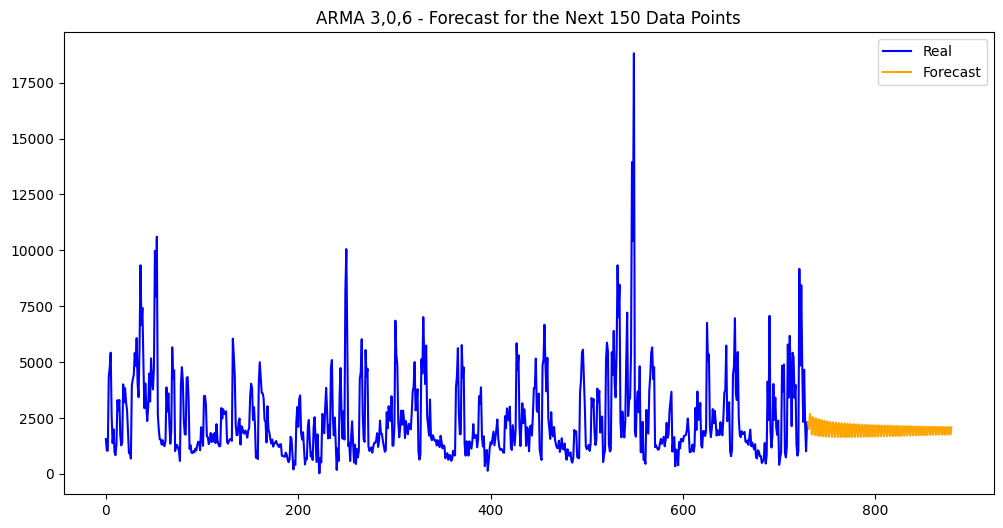

In [ ]:
# Create a simple index based on the length of the current data

model_arima = sm.tsa.ARIMA(fitted_data, order=(best_p, best_d, best_q))
results = model_arima.fit(method='innovations_mle')
index = np.arange(len(data), len(data) + 150)

# Make predictions for the next 150 steps
forecast = results.get_forecast(steps=150)
# Get the mean and confidence intervals
forecast_inv = inv_boxcox(forecast.predicted_mean, fitted_lambda)
# forecast_ci = inv_boxcox(forecast.conf_int(), fitted_lambda)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data['Jumlah Kendaraan'], label='Real', color='b')
plt.plot(index,forecast_inv , label='Forecast', color='orange')

# Area for confidence intervals
# plt.fill_between(index, forecast_ci[:, 0], forecast_ci[:, 1], color='red', alpha=0.1, label='Confidence Interval')

plt.title(f"ARMA {best_p},{best_d},{best_q} - Forecast for the Next 150 Data Points")
plt.legend()
plt.show()

#**ANALISIS**

1. Fluktuasi Harian: Garis biru yang mewakili data real menunjukkan fluktuasi yang signifikan. Ini menunjukkan bahwa jumlah kendaraan yang melintasi perempatan berubah secara signifikan dari hari ke hari. Fluktuasi ini bisa disebabkan oleh berbagai faktor, seperti perubahan pola lalu lintas karena hari kerja vs akhir pekan, cuaca, atau peristiwa khusus.

2. Lonjakan pada Hari ke-600: Sekitar hari ke-600, ada lonjakan yang mencolok dalam data real. Ini bisa menunjukkan peristiwa khusus atau perubahan dalam pola lalu lintas. Misalnya, mungkin ada peningkatan lalu lintas karena peristiwa besar atau perubahan dalam pola perjalanan.

3. Tren Penurunan dalam Ramalan: Garis orange yang mewakili ramalan menunjukkan tren penurunan yang stabil. Ini menunjukkan bahwa model peramalan memprediksi bahwa jumlah kendaraan yang melintasi perempatan akan menurun secara bertahap dalam 50 titik data berikutnya. Ini bisa menunjukkan bahwa ada perubahan jangka panjang dalam pola lalu lintas yang diharapkan, seperti penurunan lalu lintas karena perubahan infrastruktur atau pola perjalanan.

4. Akurasi Ramalan: Akurasi ramalan dapat dievaluasi dengan membandingkan garis orange (forecast) dengan garis biru (real) untuk titik data di mana kita memiliki kedua nilai tersebut. Dari visualisasi, terlihat model peramalan cukup baik dalam menangkap pola umum dalam data, meskipun mungkin tidak sempurna dalam memprediksi fluktuasi harian dan tidak bisa memforecast data dengan baik dikarenakan data terlalu banyak outliers

# Lets spice this thing up Lets do with LSTM

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Dropout

# split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Menggunakan MinMaxScaler
scaler = MinMaxScaler()

# Misalnya, data['Jumlah Kendaraan'].values adalah array NumPy yang ingin diubah
jumlah_kendaraan_values = data['Jumlah Kendaraan'].values.reshape(-1, 1)  # Perlu diubah bentuk menjadi matriks kolom

# Melakukan penskalaan data
jumlah_kendaraan_scaled = scaler.fit_transform(jumlah_kendaraan_values)

# Mengembalikan hasil scaling ke DataFrame
data['Jumlah Kendaraan Scaled'] = jumlah_kendaraan_scaled

In [ ]:
# define input sequence
raw_seq = data['Jumlah Kendaraan Scaled'].values
# choose a number of time steps
n_steps = 4
# split into samples

In [ ]:
from keras.layers import Bidirectional

X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model

In [ ]:
X

array([[[0.08145664],
        [0.05387851],
        [0.05377203],
        [0.22887718]],

       [[0.05387851],
        [0.05377203],
        [0.22887718],
        [0.25118458]],

       [[0.05377203],
        [0.22887718],
        [0.25118458],
        [0.28722781]],

       ...,

       [[0.44779854],
        [0.25666826],
        [0.12229143],
        [0.24655273]],

       [[0.25666826],
        [0.12229143],
        [0.24655273],
        [0.11590268]],

       [[0.12229143],
        [0.24655273],
        [0.11590268],
        [0.05217484]]])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 400)               323200    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 401       
                                                                 
Total params: 323601 (1.23 MB)
Trainable params: 323601 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X, y, epochs=250, verbose=1)

Epoch 1/250
23/23 [==============================] - 4s 31ms/step - loss: 0.0121
Epoch 2/250
23/23 [==============================] - 1s 30ms/step - loss: 0.0082
Epoch 3/250
23/23 [==============================] - 1s 28ms/step - loss: 0.0079
Epoch 4/250
23/23 [==============================] - 0s 17ms/step - loss: 0.0077
Epoch 5/250
23/23 [==============================] - 0s 19ms/step - loss: 0.0074
Epoch 6/250
23/23 [==============================] - 0s 17ms/step - loss: 0.0072
Epoch 7/250
23/23 [==============================] - 0s 16ms/step - loss: 0.0070
Epoch 8/250
23/23 [==============================] - 0s 17ms/step - loss: 0.0067
Epoch 9/250
23/23 [==============================] - 0s 16ms/step - loss: 0.0066
Epoch 10/250
23/23 [==============================] - 0s 17ms/step - loss: 0.0066
Epoch 11/250
23/23 [==============================] - 0s 17ms/step - loss: 0.0063
Epoch 12/250
23/23 [==============================] - 0s 17ms/step - loss: 0.0060
Epoch 13/250
23/23 [=====

In [ ]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X)

# Menghitung MSE

# scaler.inverse_transform(jumlah_kendaraan_scaled)
mse = mean_squared_error(scaler.inverse_transform(y.reshape(-1, 1)), scaler.inverse_transform(predictions))

# Menghitung RMSE
rmse = np.sqrt(mse)

print(f'RMSE: {rmse:.4f}')

23/23 [==============================] - 1s 8ms/step
RMSE: 1121.9923


In [ ]:
# demonstrate prediction
x_input = array(data['Jumlah Kendaraan Scaled'][500:504].values)
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.06350697]]


In [ ]:
data['Jumlah Kendaraan Scaled'][500:504].values

array([0.05739232, 0.06053346, 0.06750785, 0.05339935])

In [ ]:
data['Jumlah Kendaraan Scaled'][505]

0.1791513602725869

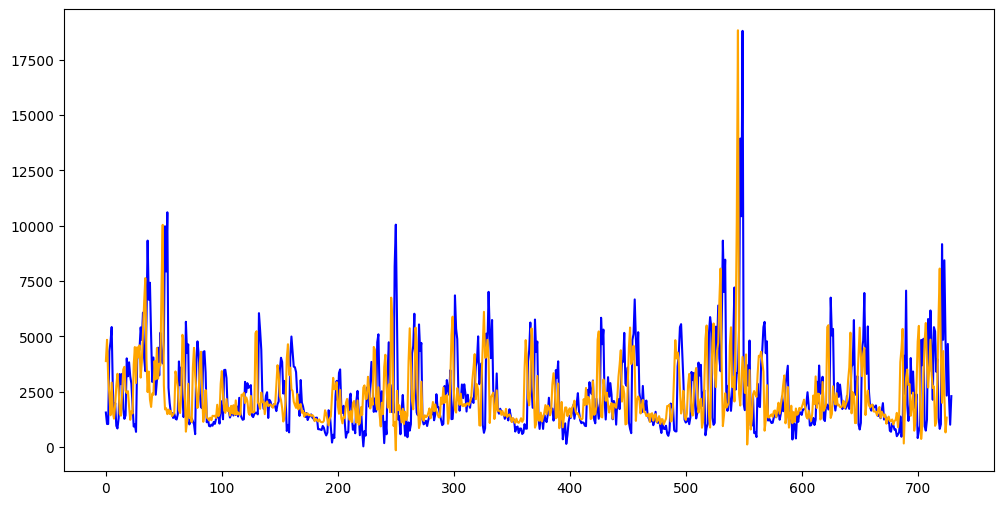

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Jumlah Kendaraan'].values, label='Real', color='b')
plt.plot(scaler.inverse_transform(predictions), label='Prediction', color='orange')

In [ ]:
def calculate_smape(actual, predicted) -> float:

    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)

    return round(
        np.mean(
            np.abs(predicted - actual) /
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [ ]:
smape_value = calculate_smape(data['Jumlah Kendaraan'].values, scaler.inverse_transform(predictions))
print(f"SMAPE: {smape_value:.2f}")

SMAPE: 60.95


In [ ]:
last_sequence = raw_seq[-n_steps:].copy()
forecast_input = last_sequence.reshape((1, n_steps, n_features))

In [ ]:
last_sequence

array([0.24655273, 0.11590268, 0.05217484, 0.1209072 ])

In [ ]:
# temp = [[],[],[]]
hasil = []
forecast_input = last_sequence.reshape((1, n_steps, n_features))
for i in range(100):
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    forecast = model.predict(forecast_input, verbose=0)
    # store forecast
    # store the forecast
    hasil.append(forecast)
    forecast_input[0][0] = forecast_input[0][1][0]
    forecast_input[0][1] = forecast_input[0][2][0]
    forecast_input[0][2] = forecast_input[0][3][0]
    forecast_input[0][3] = hasil[i][0]
print(hasil)
hasil_akhr = np.concatenate(hasil)
    # forecast_input = np.append(forecast_input, forecast)

[array([[0.16732073]], dtype=float32), array([[0.15038586]], dtype=float32), array([[0.14667183]], dtype=float32), array([[0.12927297]], dtype=float32), array([[0.10260736]], dtype=float32), array([[0.09726235]], dtype=float32), array([[0.09346074]], dtype=float32), array([[0.09396767]], dtype=float32), array([[0.09840941]], dtype=float32), array([[0.10039733]], dtype=float32), array([[0.10084721]], dtype=float32), array([[0.10184199]], dtype=float32), array([[0.10252641]], dtype=float32), array([[0.10264457]], dtype=float32), array([[0.10278279]], dtype=float32), array([[0.1029463]], dtype=float32), array([[0.10299006]], dtype=float32), array([[0.10300407]], dtype=float32), array([[0.10303637]], dtype=float32), array([[0.10305192]], dtype=float32), array([[0.10305351]], dtype=float32), array([[0.10305846]], dtype=float32), array([[0.10306288]], dtype=float32), array([[0.10306349]], dtype=float32), array([[0.10306396]], dtype=float32), array([[0.10306496]], dtype=float32), array([[0.10

In [ ]:
hasil_akhir = hasil_akhr.flatten()
hasil_akhir

array([0.16732073, 0.15038586, 0.14667183, 0.12927297, 0.10260736,
       0.09726235, 0.09346074, 0.09396767, 0.09840941, 0.10039733,
       0.10084721, 0.10184199, 0.10252641, 0.10264457, 0.10278279,
       0.1029463 , 0.10299006, 0.10300407, 0.10303637, 0.10305192,
       0.10305351, 0.10305846, 0.10306288, 0.10306349, 0.10306396,
       0.10306496, 0.10306526, 0.10306527, 0.10306543, 0.10306554,
       0.10306554, 0.10306558, 0.10306561, 0.10306562, 0.10306562,
       0.10306564, 0.10306565, 0.10306566, 0.10306566, 0.10306567,
       0.10306568, 0.10306567, 0.10306566, 0.10306566, 0.10306567,
       0.10306567, 0.10306566, 0.10306567, 0.10306567, 0.10306567,
       0.10306566, 0.10306566, 0.10306568, 0.10306568, 0.10306566,
       0.10306566, 0.10306567, 0.10306567, 0.10306566, 0.10306567,
       0.10306567, 0.10306567, 0.10306566, 0.10306566, 0.10306568,
       0.10306568, 0.10306566, 0.10306566, 0.10306567, 0.10306567,
       0.10306566, 0.10306567, 0.10306567, 0.10306567, 0.10306

In [ ]:
original_array_reshaped = hasil_akhir.reshape(-1, 1)

inverse_scaled_array = scaler.inverse_transform(original_array_reshaped)

In [ ]:
inverse_scaled_array

array([[3171.7854],
       [2853.6978],
       [2783.937 ],
       [2457.1343],
       [1956.274 ],
       [1855.8787],
       [1784.473 ],
       [1793.9946],
       [1877.4238],
       [1914.7631],
       [1923.2131],
       [1941.898 ],
       [1954.7535],
       [1956.9729],
       [1959.569 ],
       [1962.6403],
       [1963.4623],
       [1963.7253],
       [1964.3322],
       [1964.624 ],
       [1964.654 ],
       [1964.747 ],
       [1964.83  ],
       [1964.8414],
       [1964.8502],
       [1964.8691],
       [1964.8748],
       [1964.8749],
       [1964.8779],
       [1964.8799],
       [1964.8799],
       [1964.8807],
       [1964.8813],
       [1964.8815],
       [1964.8816],
       [1964.8818],
       [1964.8821],
       [1964.8823],
       [1964.8823],
       [1964.8824],
       [1964.8826],
       [1964.8824],
       [1964.8823],
       [1964.8823],
       [1964.8824],
       [1964.8824],
       [1964.8823],
       [1964.8824],
       [1964.8824],
       [1964.8824],


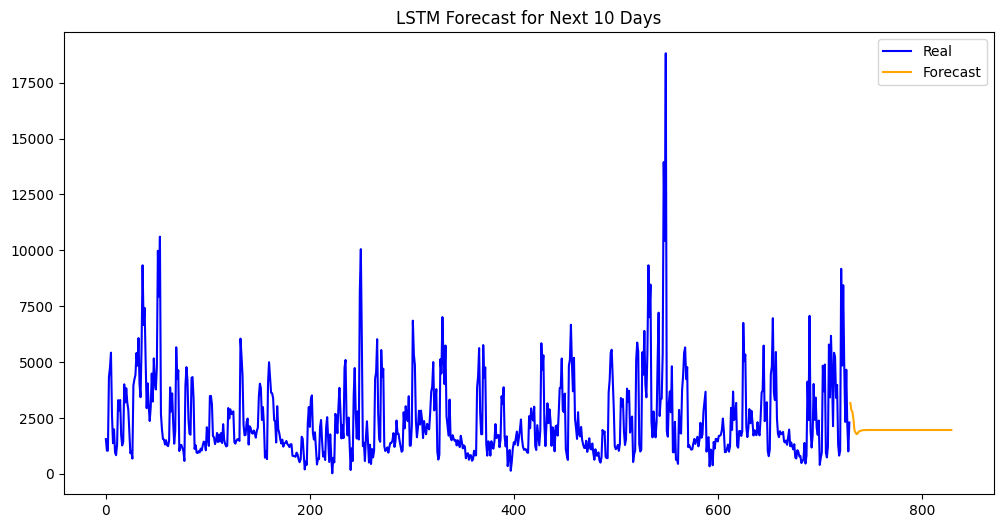

In [ ]:

# Get the mean and confidence intervals
# forecast_ci = inv_boxcox(forecast.conf_int(), fitted_lambda)
index = np.arange(len(data), len(data) + 100)
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data['Jumlah Kendaraan'], label='Real', color='b')
plt.plot(index,inverse_scaled_array , label='Forecast', color='orange')

# Area for confidence intervals
# plt.fill_between(index, forecast_ci[:, 0], forecast_ci[:, 1], color='red', alpha=0.1, label='Confidence Interval')

plt.title(f"LSTM Forecast for Next 10 Days")
plt.legend()
plt.show()